#**지하철 적자 완화 방안**

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
plt.rc('font', family='NanumBarunGothic') 

## **Data Loading**

In [3]:
df = pd.read_excel('EDA_dataset.xlsx', thousands=',')

## **Data EDA & Preprocesscing**

In [4]:
print(df.shape)

(298, 26)


In [5]:
df.head()

호선  역이름     유임승차    무임승차     유임하차    무임하차   출퇴근시간 이용객수  출퇴근시간 제외한 이용객수   \
0  1호선  동대문   212719  117499   198987  118515  201212.7912     6.684911e+05   
1  1호선  동묘앞   122460  146455   131299  147539  139446.4615     4.594895e+05   
2  1호선  서울역  1150754  194717  1123193  187155  965310.6264     2.019218e+06   
3  1호선   시청   537067   80671   543569   78279  522431.5495     8.439801e+05   
4  1호선  신설동   264825  112362   252339  106855  301949.8242     5.763451e+05   

   역별승강기  역간거리(km)  ... 지역내총생산(2016)(백만원)  기초생활수급자  자치구별 재난지원금 대상자 비율   \
0      4       0.6  ...          28036775     5559                70.2   
1     19       0.7  ...          28036775     5559                70.2   
2      7       1.1  ...          48654807     5905                73.1   
3      6       1.0  ...          48654807     5905                73.1   
4      5       0.9  ...           7180082    16190                80.7   

    석유사용량(bbl)  지역별 도로면적  교통안전지수   자동차수  통근 통학시 지하철 이용 비율  250m내 버스정류장 수  \
0  13516.80335   2701070   79.78  50533              30.4              5   
1  13516.80335   2701070   79.78  50533              30.4              8   
2  71269.84584   1876189   75.20  58919              41.1             10   
3  71269.84584   1876189   75.20  58919              41.1              7   
4  56891.33842   3151074   77.07  98441              32.1             11   

   자치구별 지하철역 개수  
0            15  
1            15  
2            24  
3            24  
4            14  

[5 rows x 26 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   호선                  298 non-null    object 
 1   역이름                 298 non-null    object 
 2   유임승차                298 non-null    int64  
 3   무임승차                298 non-null    int64  
 4   유임하차                298 non-null    int64  
 5   무임하차                298 non-null    int64  
 6   출퇴근시간 이용객수          298 non-null    float64
 7   출퇴근시간 제외한 이용객수      298 non-null    float64
 8   역별승강기               298 non-null    int64  
 9   역간거리(km)            298 non-null    float64
 10  지역                  298 non-null    object 
 11  인구수                 298 non-null    int64  
 12  노인인구수               298 non-null    int64  
 13  인구수(사분위수)           298 non-null    int64  
 14  인구밀도 (명/㎢)          298 non-null    int64  
 15  지역별통근인원비율(12세 이상)   298 non-null    float64
 16  지역내총생산(2

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

유임승차           무임승차          유임하차           무임하차    출퇴근시간 이용객수  \
count  2.980000e+02     298.000000  2.980000e+02     298.000000  2.980000e+02   
mean   3.533565e+05   70348.661074  3.553363e+05   69506.651007  3.095892e+05   
std    3.003806e+05   49444.866649  3.061721e+05   48822.352725  2.527668e+05   
min    4.000000e+00       0.000000  0.000000e+00       0.000000  2.437500e+00   
25%    1.658720e+05   36468.250000  1.603520e+05   35791.500000  1.485651e+05   
50%    2.701235e+05   59373.000000  2.665200e+05   59457.500000  2.422759e+05   
75%    4.333365e+05   87773.000000  4.542015e+05   87842.750000  3.823271e+05   
max    2.055521e+06  299617.000000  2.039847e+06  281985.000000  1.629976e+06   

       출퇴근시간 제외한 이용객수        역별승강기    역간거리(km)            인구수          노인인구수  \
count     2.980000e+02  298.000000  298.000000     298.000000     298.000000   
mean      6.247881e+05   10.788591    1.104430  400803.234899   67309.312081   
std       5.475762e+05    6.943175    0.409725  149148.821944   22788.264627   
min       4.125000e+00    0.000000    0.600000  124455.000000   24948.000000   
25%       2.782528e+05    6.000000    0.900000  315728.000000   53572.250000   
50%       4.659975e+05    9.000000    1.000000  398137.000000   67815.000000   
75%       7.508656e+05   15.000000    1.200000  503404.000000   87167.500000   
max       3.858467e+06   39.000000    4.400000  665231.000000  101086.000000   

       ...  지역내총생산(2016)(백만원)      기초생활수급자  자치구별 재난지원금 대상자 비율      석유사용량(bbl)  \
count  ...       2.980000e+02    298.00000          298.000000     298.000000   
mean   ...       1.979129e+07  15599.59396           70.649664  128622.683298   
std    ...       1.701178e+07   7696.84412           11.887322  157682.884287   
min    ...       2.816851e+06   5559.00000           45.200000   13516.803350   
25%    ...       5.970256e+06  10241.00000           64.100000   48154.791260   
50%    ...       1.073972e+07  13861.00000           73.100000   67870.203120   
75%    ...       2.803678e+07  17769.00000           80.700000  178618.046300   
max    ...       5.998151e+07  32553.00000           89.000000  690250.123800   

           지역별 도로면적      교통안전지수           자동차수  통근 통학시 지하철 이용 비율  \
count  2.980000e+02  298.000000     298.000000        298.000000   
mean   3.822693e+06   77.069933  143342.721477         38.069799   
std    1.160590e+06    3.626074   62266.465321          5.437991   
min    1.876189e+06   67.520000   50533.000000         28.800000   
25%    2.962563e+06   75.200000   99327.000000         32.500000   
50%    3.541933e+06   78.630000  134336.000000         38.200000   
75%    4.953894e+06   79.480000  176544.000000         42.625000   
max    5.789862e+06   83.000000  249843.000000         48.400000   

       250m내 버스정류장 수  자치구별 지하철역 개수  
count     298.000000    298.000000  
mean        7.889262     19.244966  
std         3.794975      6.968693  
min         0.000000      4.000000  
25%         5.000000     15.000000  
50%         7.000000     19.000000  
75%        10.000000     24.000000  
max        22.000000     33.000000  

[8 rows x 23 columns]

In [62]:
# 데이터를 수치형으로 바꾸기 - 라벨인코더 사용
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

df["호선"] = le.fit_transform(df["호선"])
df["역이름"] = le.fit_transform(df["역이름"])
df["지역"] = le.fit_transform(df['지역'])

df.head(5)

호선  역이름     유임승차    무임승차     유임하차    무임하차   출퇴근시간 이용객수  출퇴근시간 제외한 이용객수   \
0   0   64   212719  117499   198987  118515  201212.7912     6.684911e+05   
1   0   67   122460  146455   131299  147539  139446.4615     4.594895e+05   
2   0  126  1150754  194717  1123193  187155  965310.6264     2.019218e+06   
3   0  144   537067   80671   543569   78279  522431.5495     8.439801e+05   
4   0  159   264825  112362   252339  106855  301949.8242     5.763451e+05   

   역별승강기  역간거리(km)  ...  지역내총생산(2016)(백만원)  기초생활수급자  자치구별 재난지원금 대상자 비율   \
0      4       0.6  ...           28036775     5559                70.2   
1     19       0.7  ...           28036775     5559                70.2   
2      7       1.1  ...           48654807     5905                73.1   
3      6       1.0  ...           48654807     5905                73.1   
4      5       0.9  ...            7180082    16190                80.7   

    석유사용량(bbl)  지역별 도로면적  교통안전지수   자동차수  통근 통학시 지하철 이용 비율  250m내 버스정류장 수  \
0  13516.80335   2701070   79.78  50533              30.4              5   
1  13516.80335   2701070   79.78  50533              30.4              8   
2  71269.84584   1876189   75.20  58919              41.1             10   
3  71269.84584   1876189   75.20  58919              41.1              7   
4  56891.33842   3151074   77.07  98441              32.1             11   

   자치구별 지하철역 개수  
0            15  
1            15  
2            24  
3            24  
4            14  

[5 rows x 26 columns]

In [63]:
area_col = df.iloc[:,10:26]

In [64]:
area_col.columns

Index(['지역', '인구수', '노인인구수', '인구수(사분위수)', '인구밀도 (명/㎢)', '지역별통근인원비율(12세 이상)',
       '지역내총생산(2016)(백만원)', '기초생활수급자', '자치구별 재난지원금 대상자 비율 ', '석유사용량(bbl)',
       '지역별 도로면적', '교통안전지수', '자동차수', '통근 통학시 지하철 이용 비율', '250m내 버스정류장 수',
       '자치구별 지하철역 개수'],
      dtype='object')

In [65]:
def EDA_int (data):
  colors = sns.color_palette("Blues")
  for i in area_col:
    if data[i].dtypes != 'object':

      #히스토그램
      sns.distplot(data,x = data[i],bins=10)
      plt.title(i)
      plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


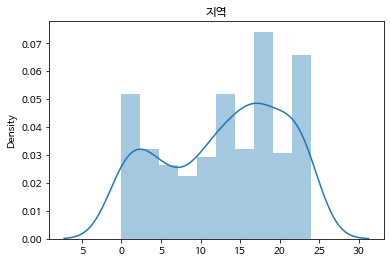

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


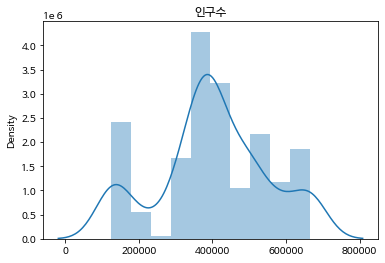

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


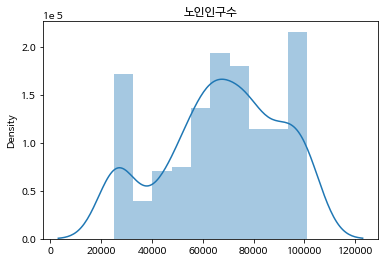

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


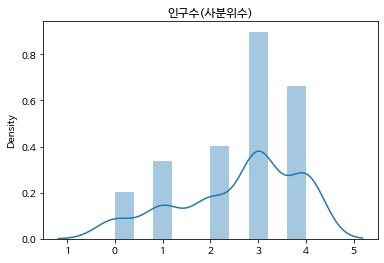

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


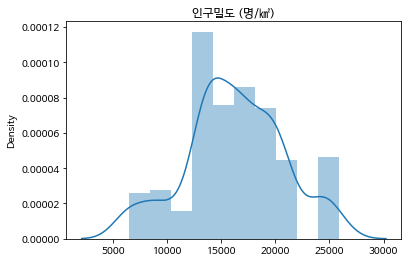

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


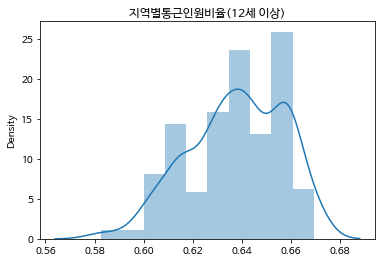

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


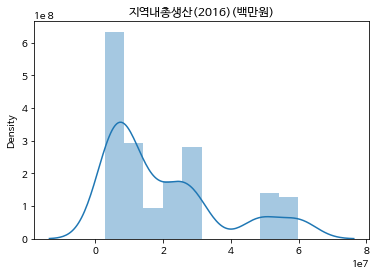

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


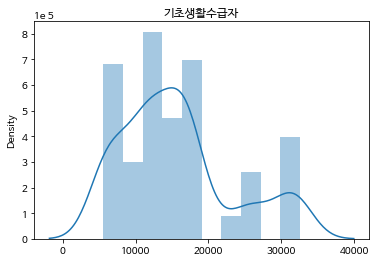

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


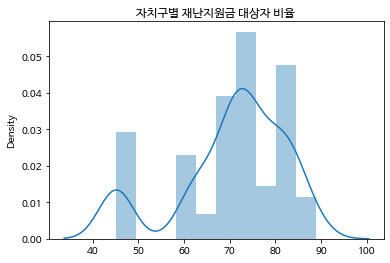

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


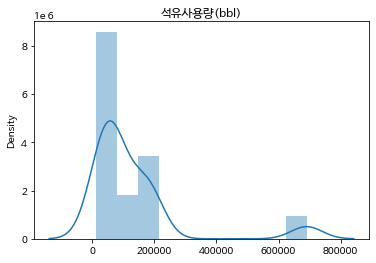

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


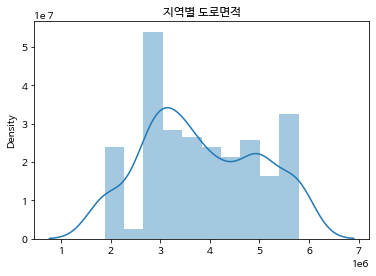

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


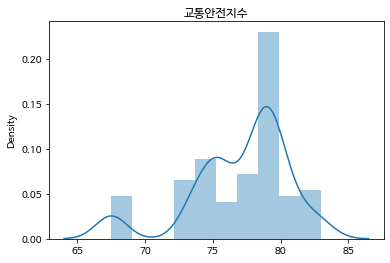

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


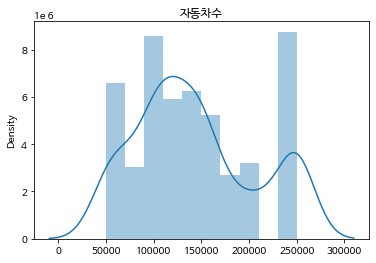

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


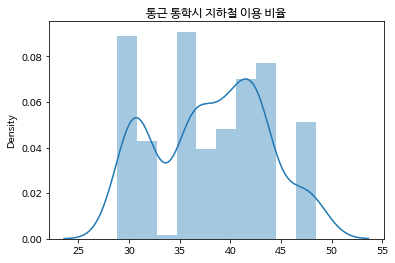

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


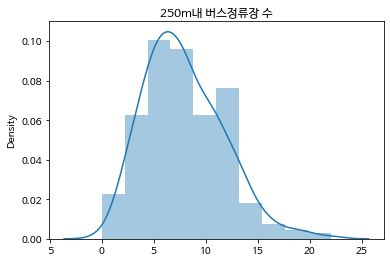

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


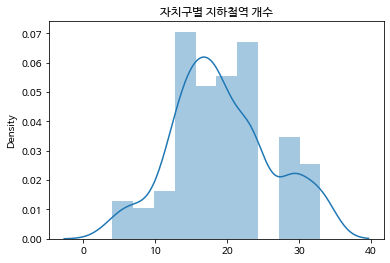

In [66]:
EDA_int(df)

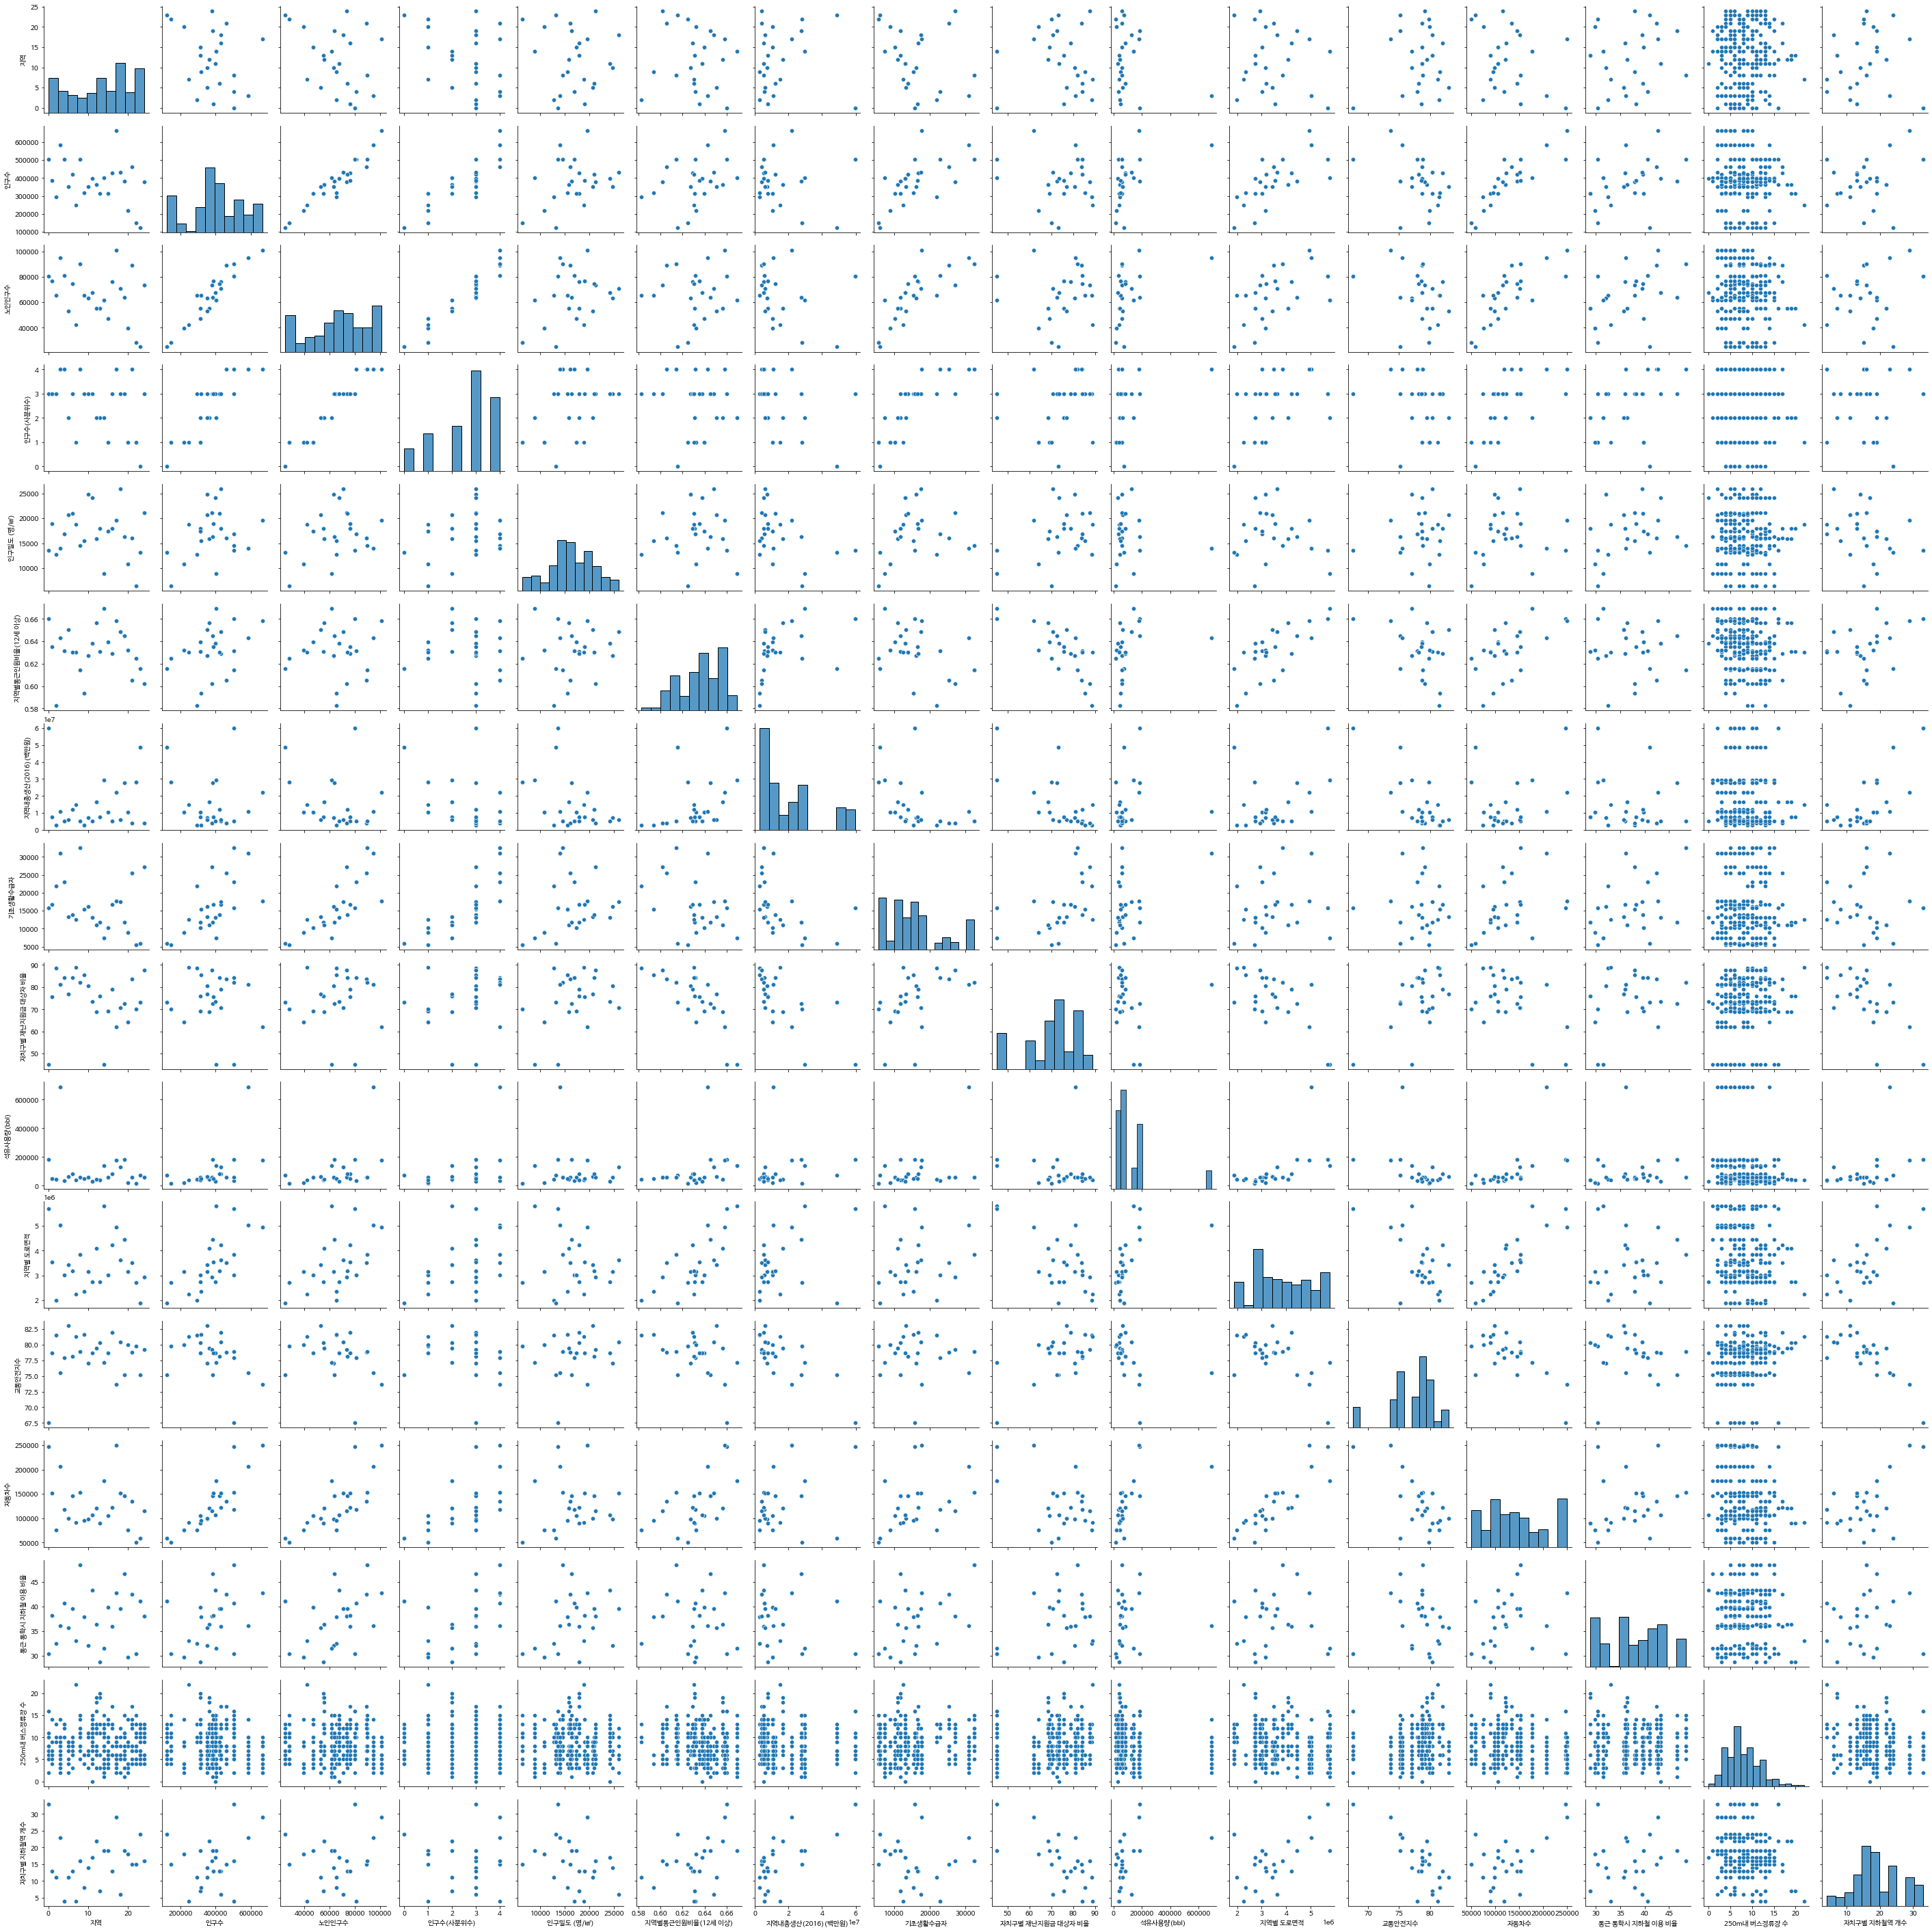

In [67]:
sns.pairplot(area_col,diag_kind='hist' )
plt.show()

- 도로면적이랑 선형관계있는 것들 조금 보이는듯? 지하철이랑
노상관이지만.

In [68]:
not_area_col = df.iloc[:,0:11]

In [69]:
not_area_col

호선  역이름     유임승차    무임승차     유임하차    무임하차   출퇴근시간 이용객수  출퇴근시간 제외한 이용객수   \
0     0   64   212719  117499   198987  118515  201212.7912     6.684911e+05   
1     0   67   122460  146455   131299  147539  139446.4615     4.594895e+05   
2     0  126  1150754  194717  1123193  187155  965310.6264     2.019218e+06   
3     0  144   537067   80671   543569   78279  522431.5495     8.439801e+05   
4     0  159   264825  112362   252339  106855  301949.8242     5.763451e+05   
..   ..  ...      ...     ...      ...     ...          ...              ...   
293   8  179   257411   27359   264238   27012  220382.0000     3.556380e+05   
294   8  192   189680   29827   188598   30174  129157.0000     3.091220e+05   
295   8  220   108132   18166   109097   16879   82127.0000     1.701470e+05   
296   8  223   215744   73370   186076   71732  195012.0000     3.519100e+05   
297   8  243    60402   15470    54969   13958   49416.0000     9.538300e+04   

     역별승강기  역간거리(km)  지역  
0        4      0.60  22  
1       19      0.70  22  
2        7      1.10  23  
3        6      1.00  23  
4        5      0.90  10  
..     ...       ...  ..  
293     32      0.95   0  
294     17      1.14  17  
295     24      0.95  17  
296     15      1.14   1  
297     15      1.14  17  

[298 rows x 11 columns]

In [70]:
def EDA_int2 (data):
  colors = sns.color_palette("Blues")
  for i in not_area_col:
    if data[i].dtypes != 'object':

      #히스토그램
      sns.distplot(data,x = data[i],bins=10)
      plt.title(i)
      plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


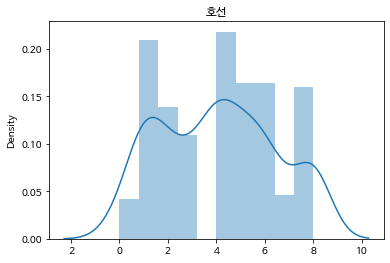

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


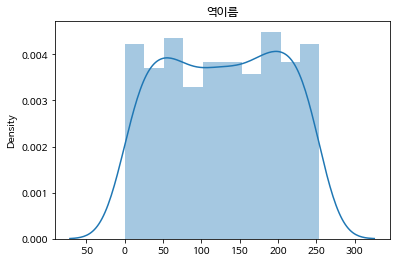

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


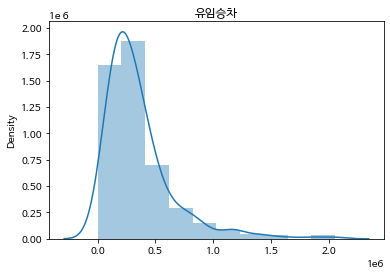

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


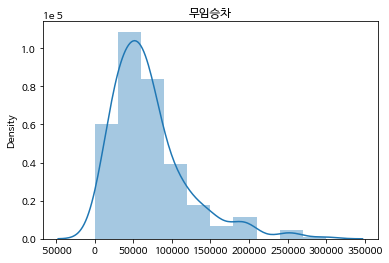

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


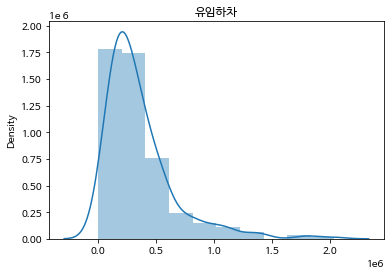

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


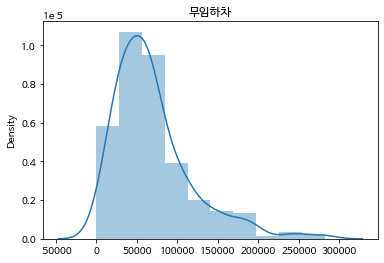

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


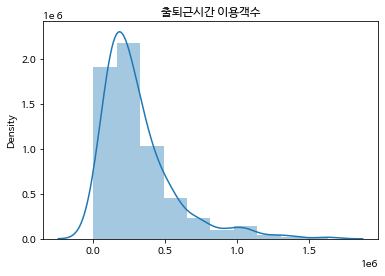

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


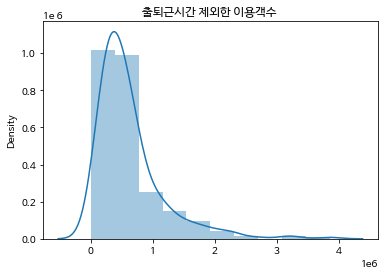

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


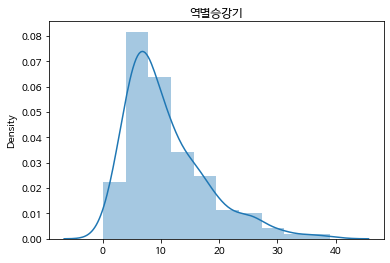

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


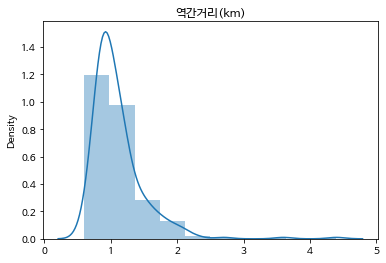

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


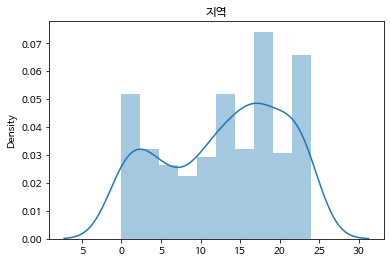

In [71]:
EDA_int2(df)

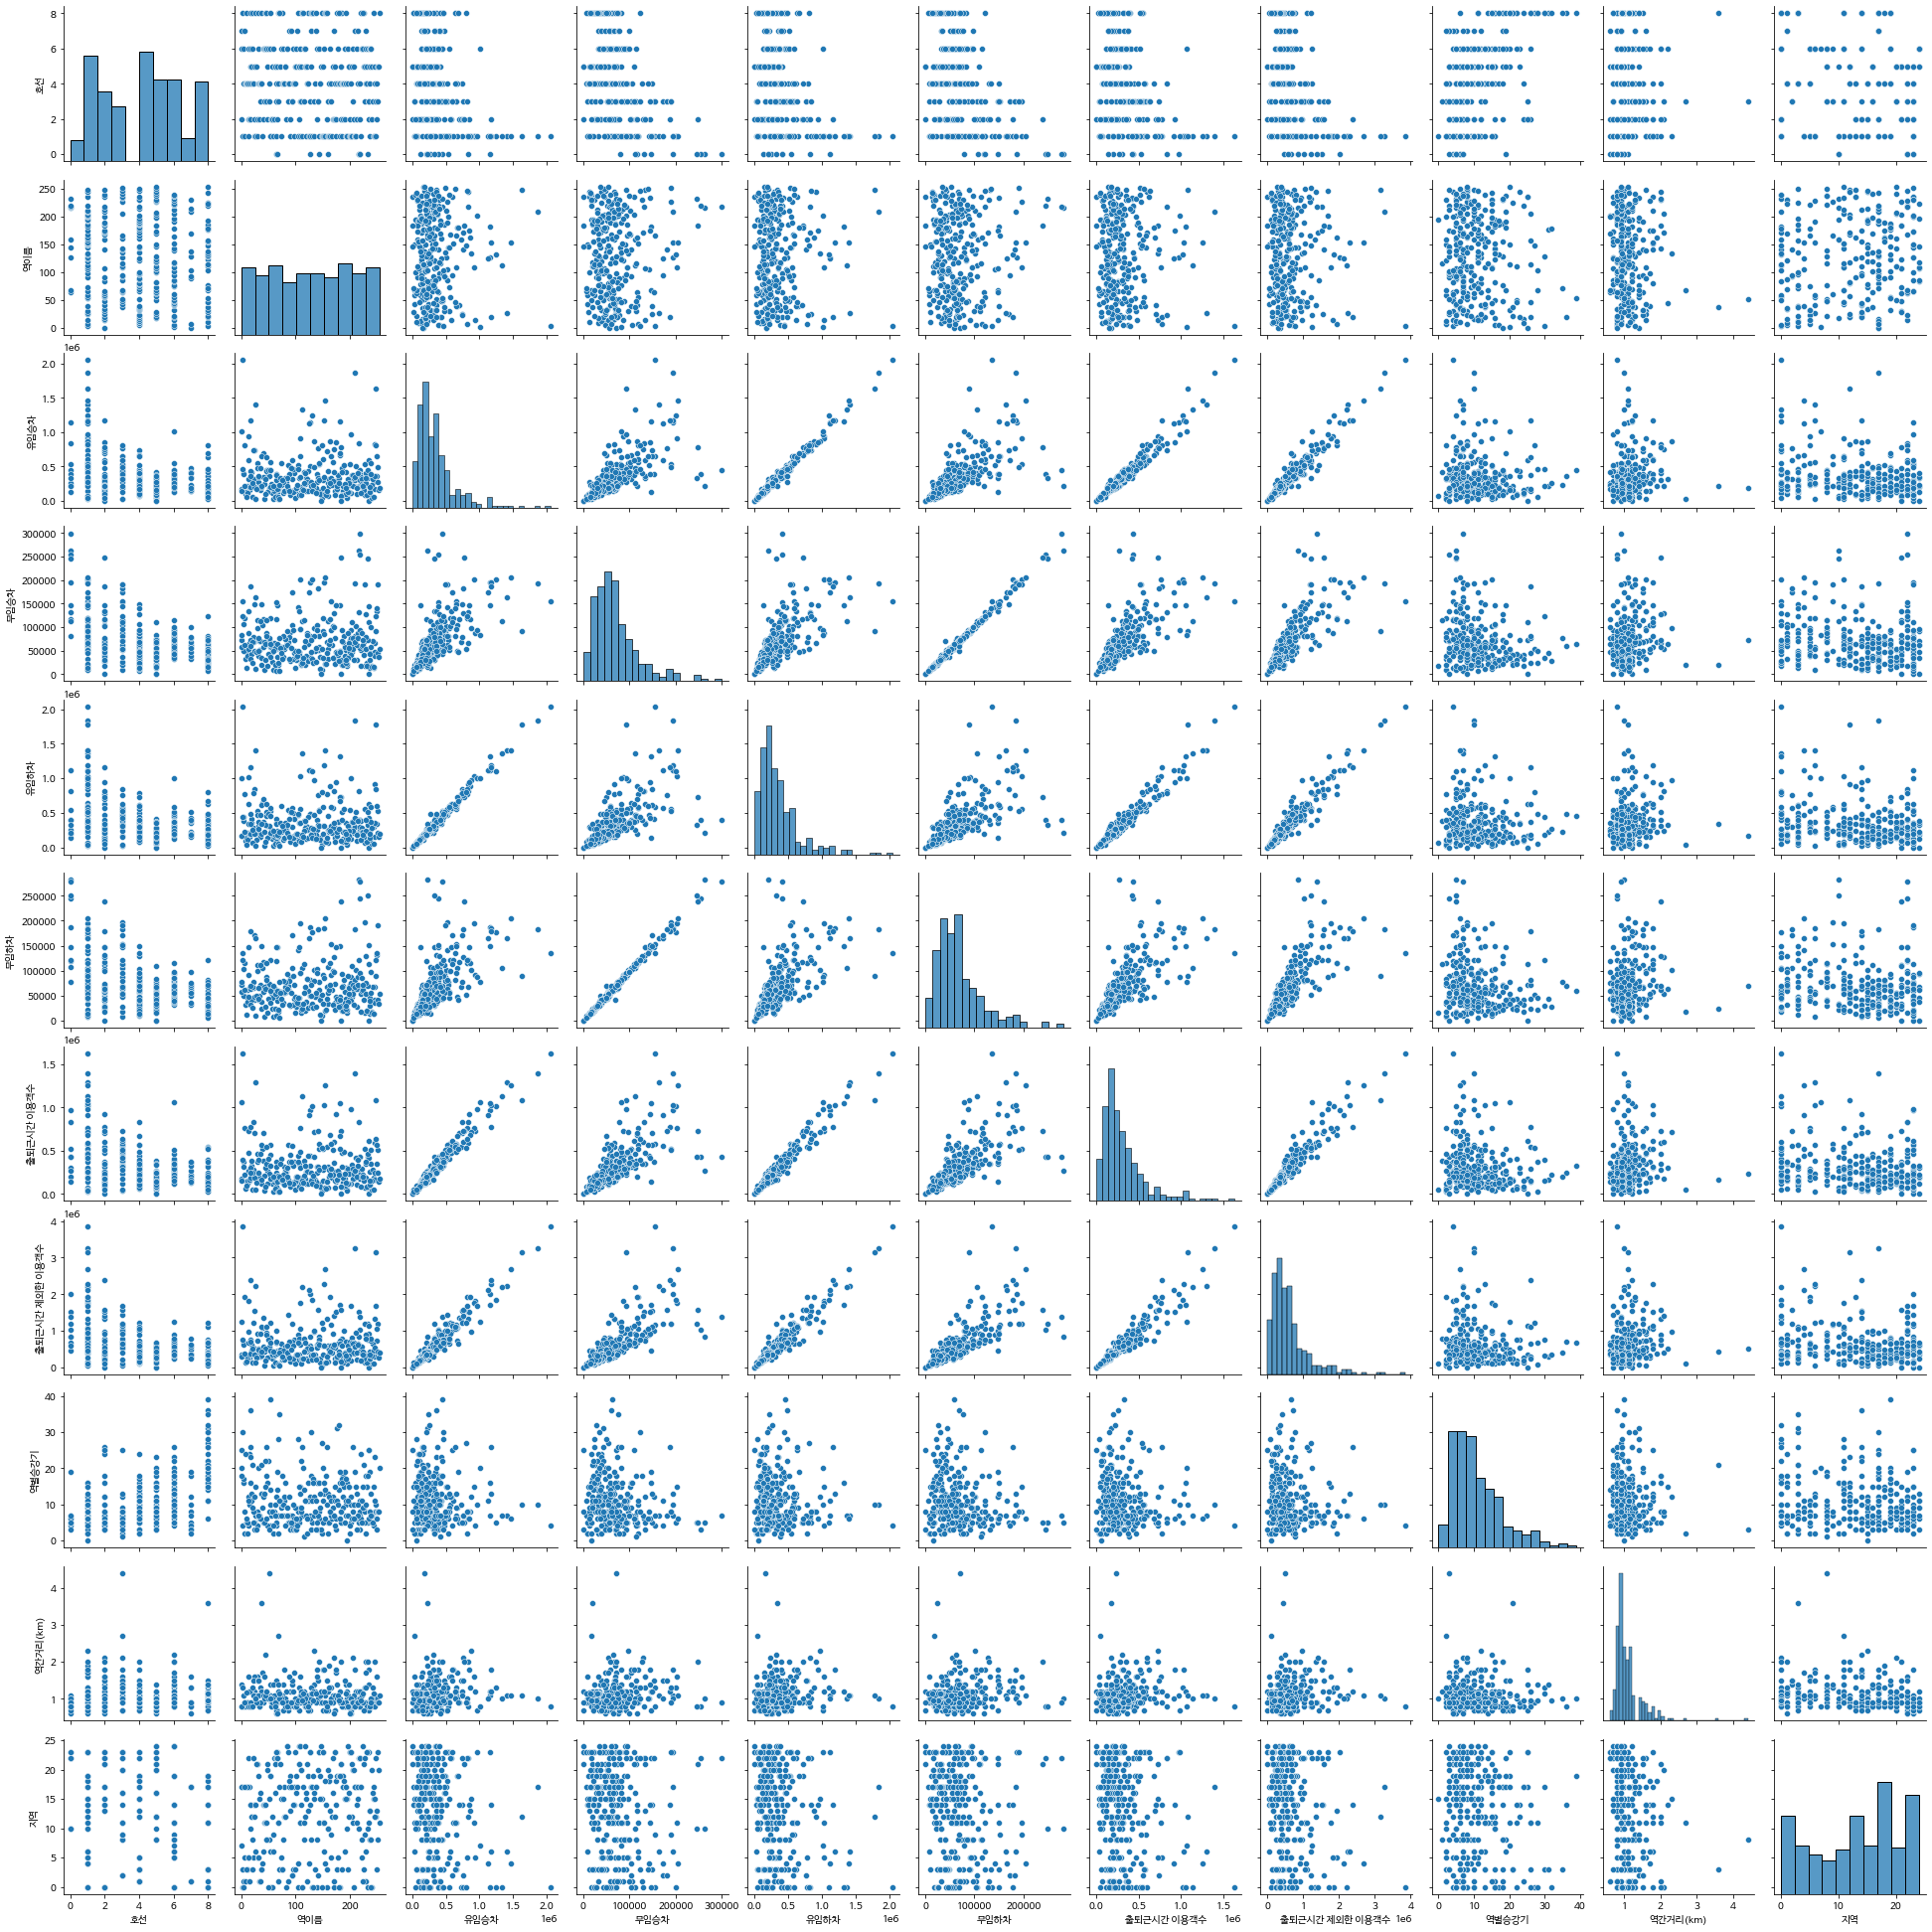

In [72]:
sns.pairplot(not_area_col,diag_kind='hist' )
plt.show()

- 너무 당연한 유무임승차간에 말고 보자

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


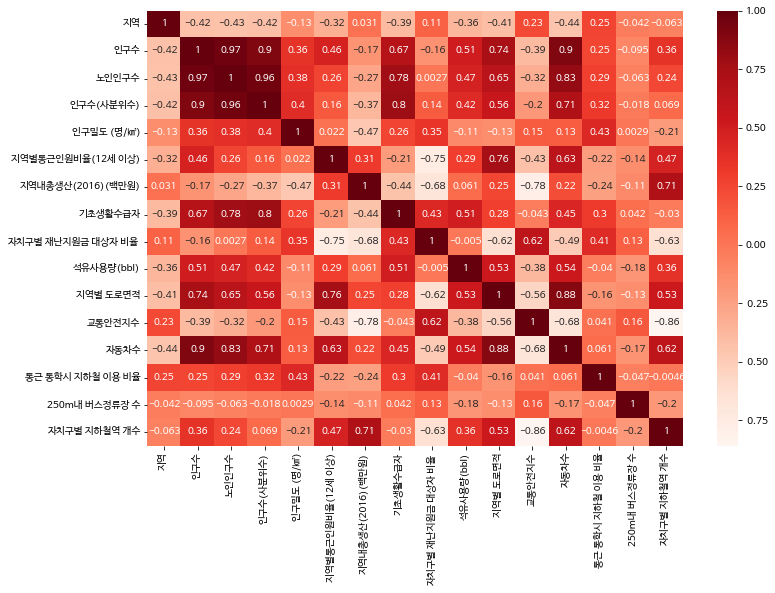

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(area_col.corr(), annot=True, cmap= plt.cm.Reds)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


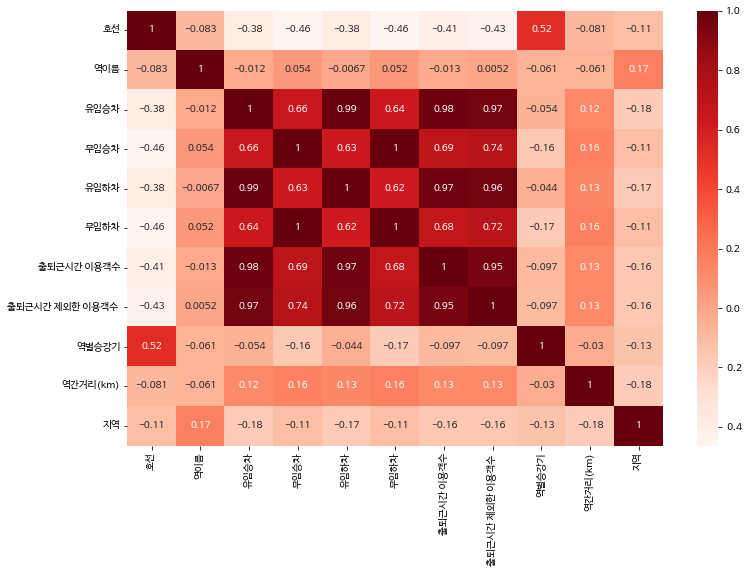

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(not_area_col.corr(), annot=True, cmap= plt.cm.Blues)

In [80]:
new_df = df[['호선','유임승차','무임승차','유임하차','무임하차','인구수', '노인인구수', '인구밀도 (명/㎢)', '지역별통근인원비율(12세 이상)',
       '지역내총생산(2016)(백만원)', '기초생활수급자', '자치구별 재난지원금 대상자 비율 ', '석유사용량(bbl)',
       '지역별 도로면적', '교통안전지수', '자동차수', '통근 통학시 지하철 이용 비율', '250m내 버스정류장 수',
       '자치구별 지하철역 개수']]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


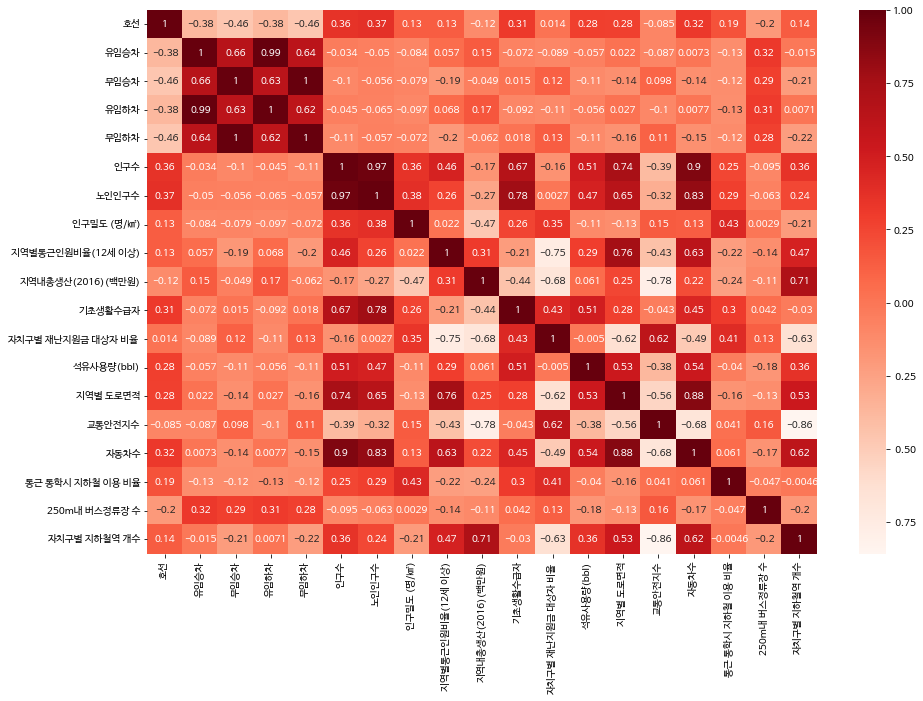

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), annot=True, cmap= plt.cm.Reds)

- 노인인구수 말고 노인인구 비율로 봐야하나 싶고,,ㅐ 이유: 인구수 많으면 당연히 노인인구수도 많음

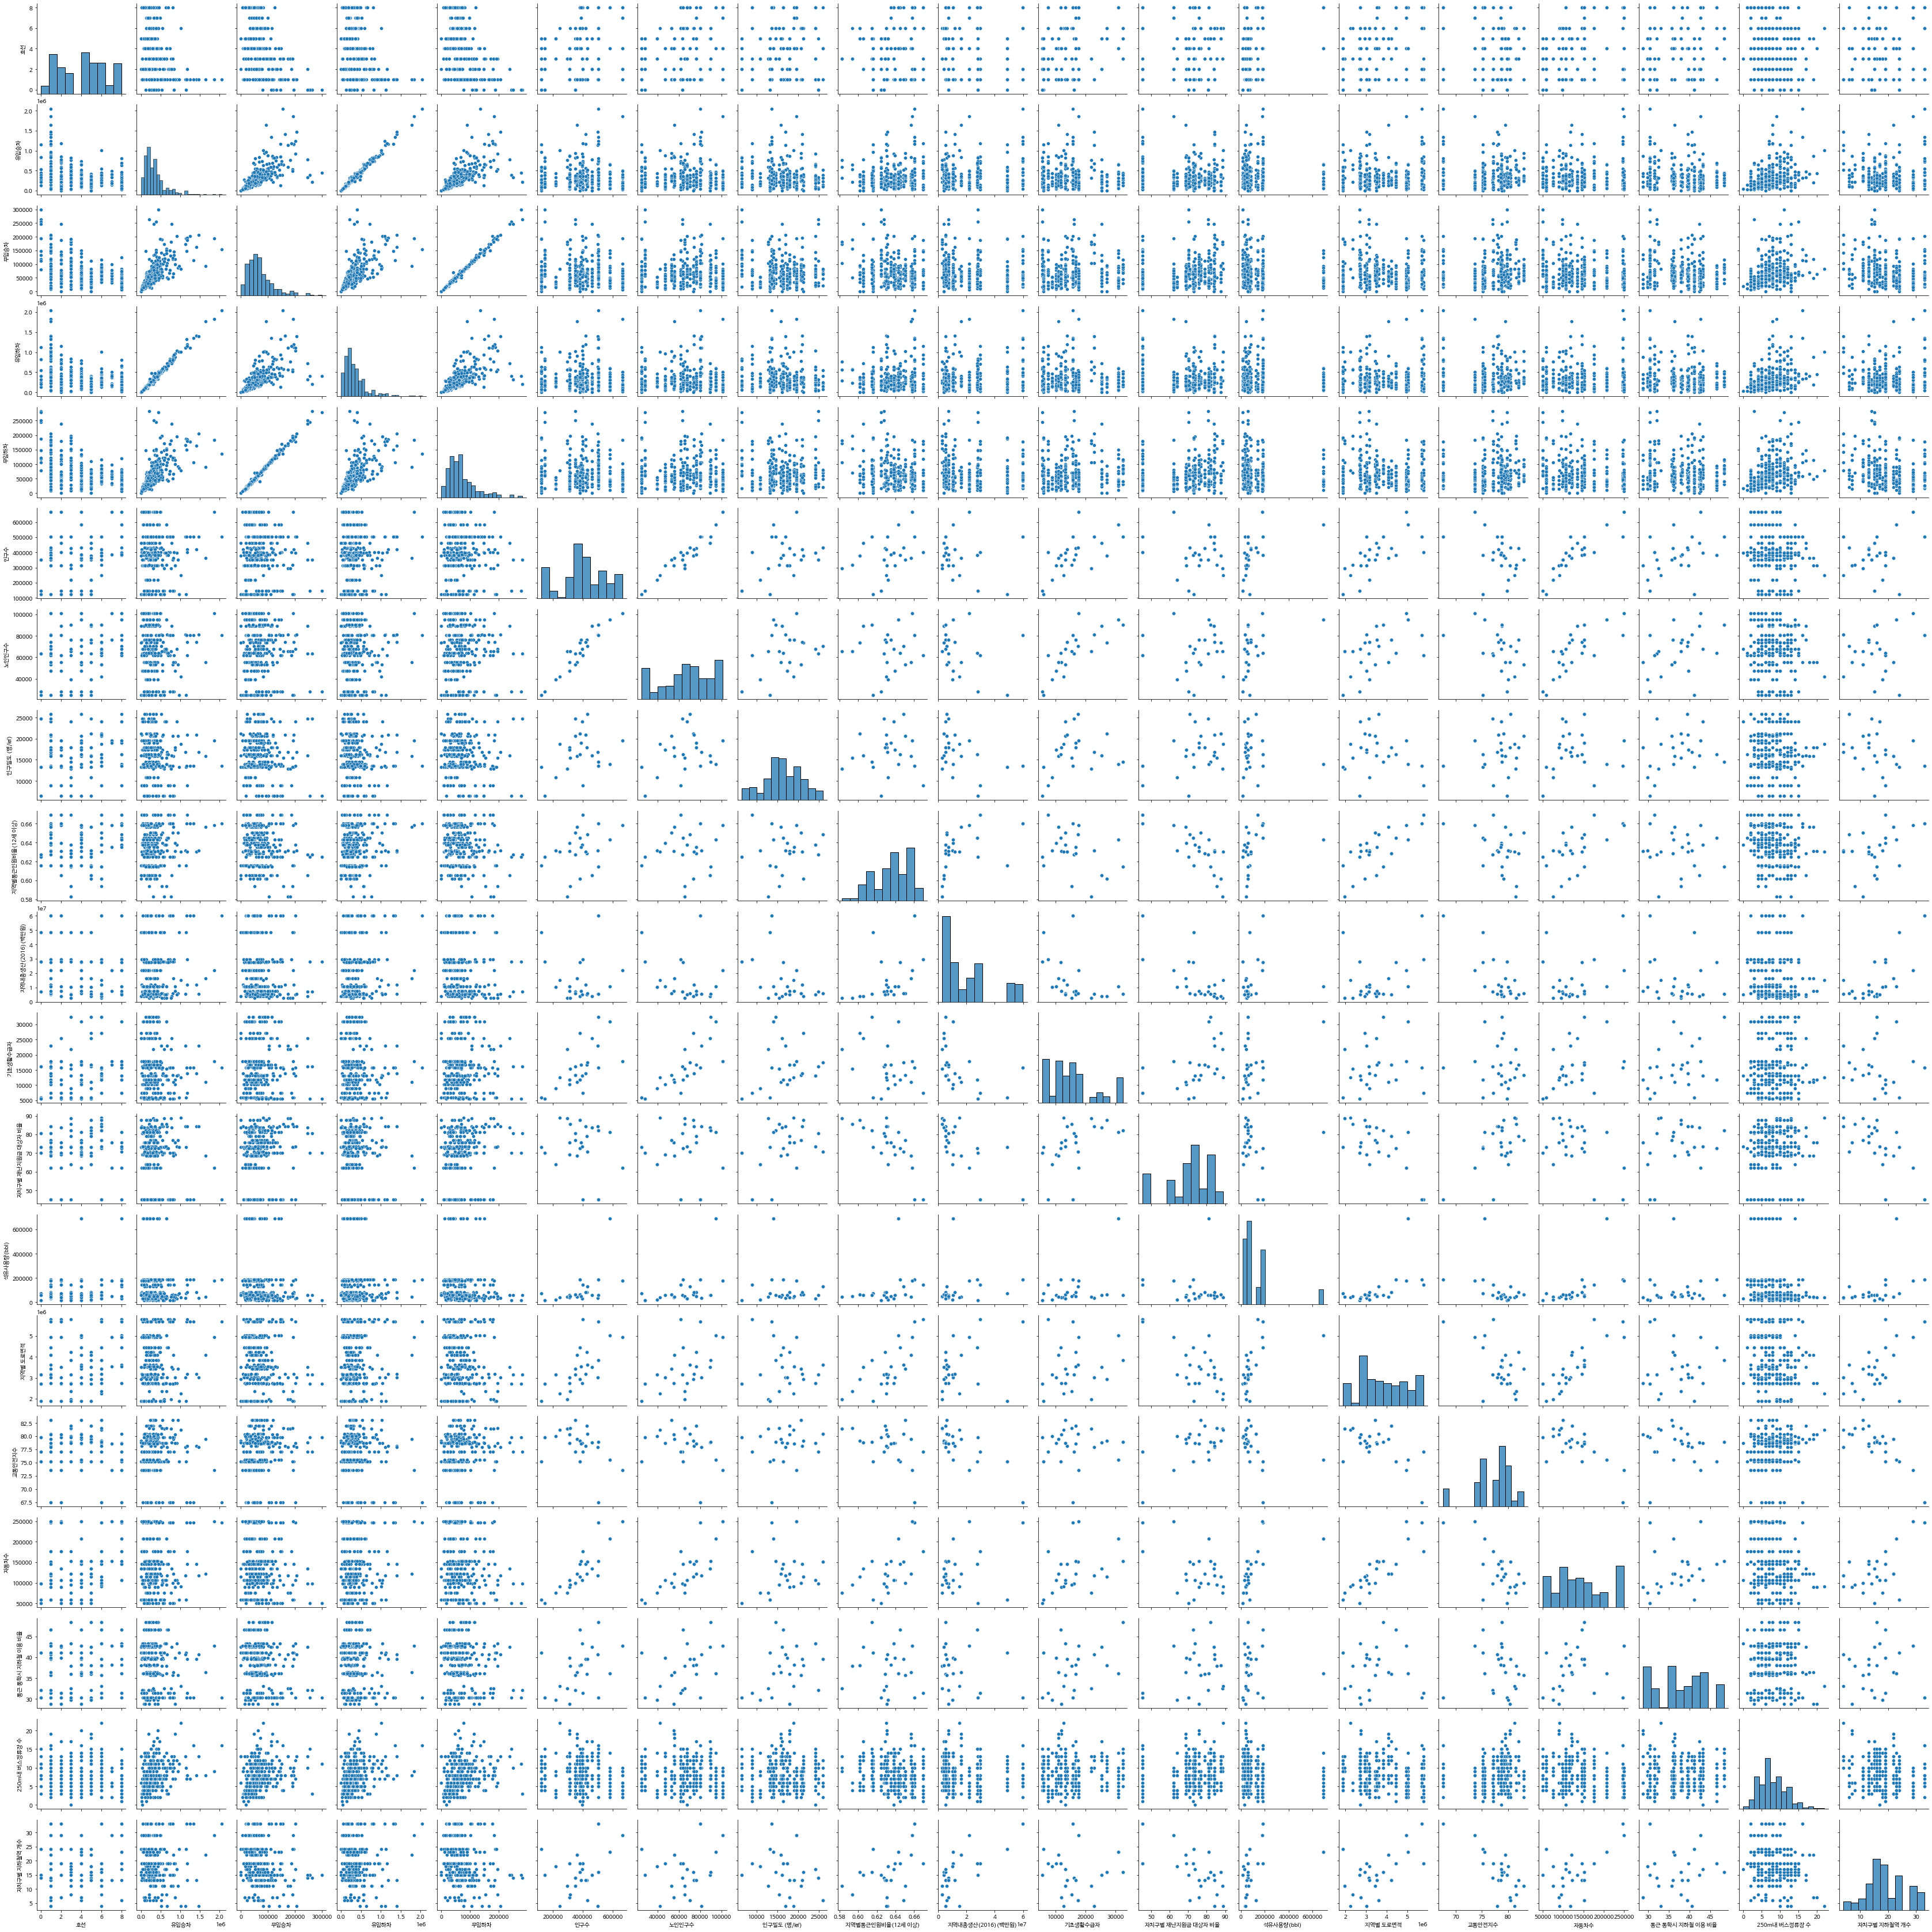

In [83]:
sns.pairplot(new_df,diag_kind='hist' )
plt.show()

**지역별 자세히?**

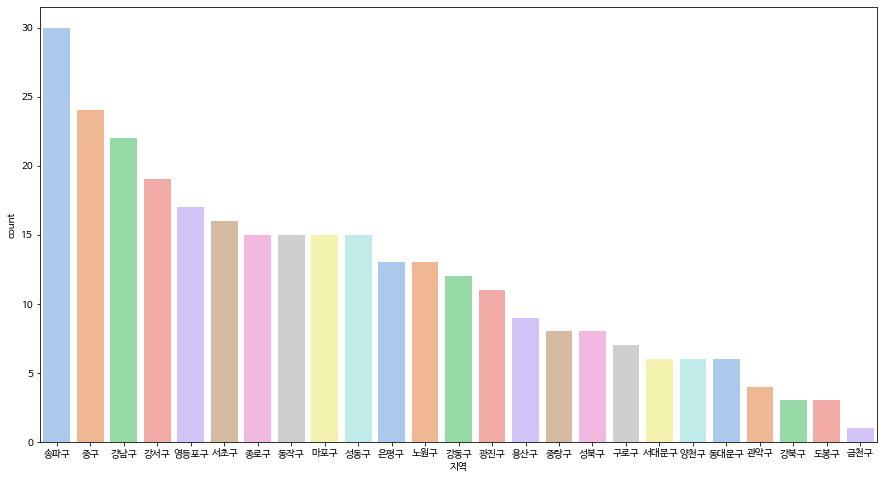

In [12]:
#지역별 지하철역 개수 
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data = df , x = '지역',palette='pastel',order = df['지역'].value_counts().index)
plt.show()

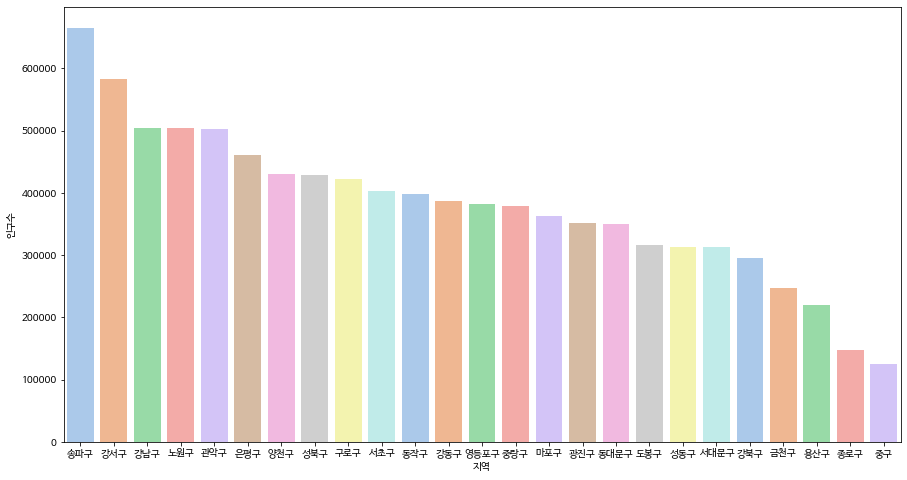

In [13]:
# 지역별 총인구 수

df4 = df.sort_values('인구수',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y='인구수', data = df4 ,palette='pastel')

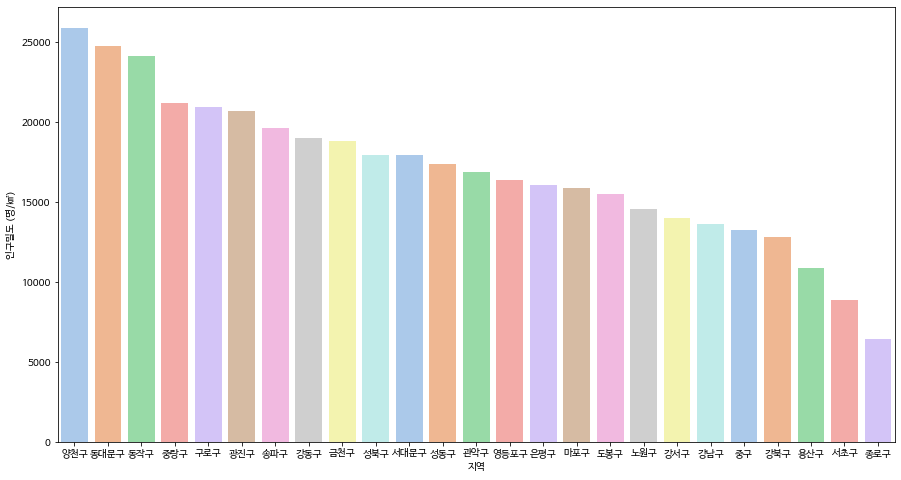

In [14]:
#지역별 인구밀도
df3 = df.sort_values('인구밀도 (명/㎢)',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y='인구밀도 (명/㎢)', data = df3 ,palette='pastel')

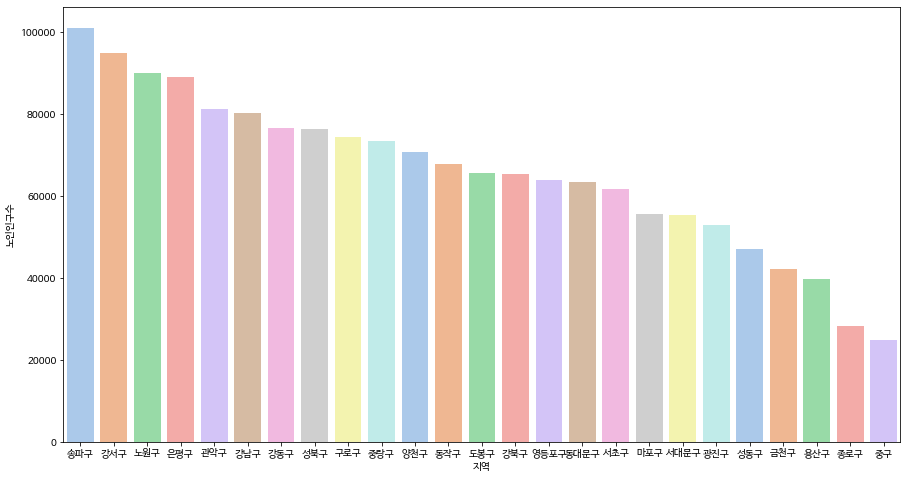

In [15]:
#지역별 노인인구 수

df2 = df.sort_values('노인인구수',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y='노인인구수', data = df2 ,palette='pastel')

**-------------------------------이미지라 x,y 살펴봐야함--------------------------------**

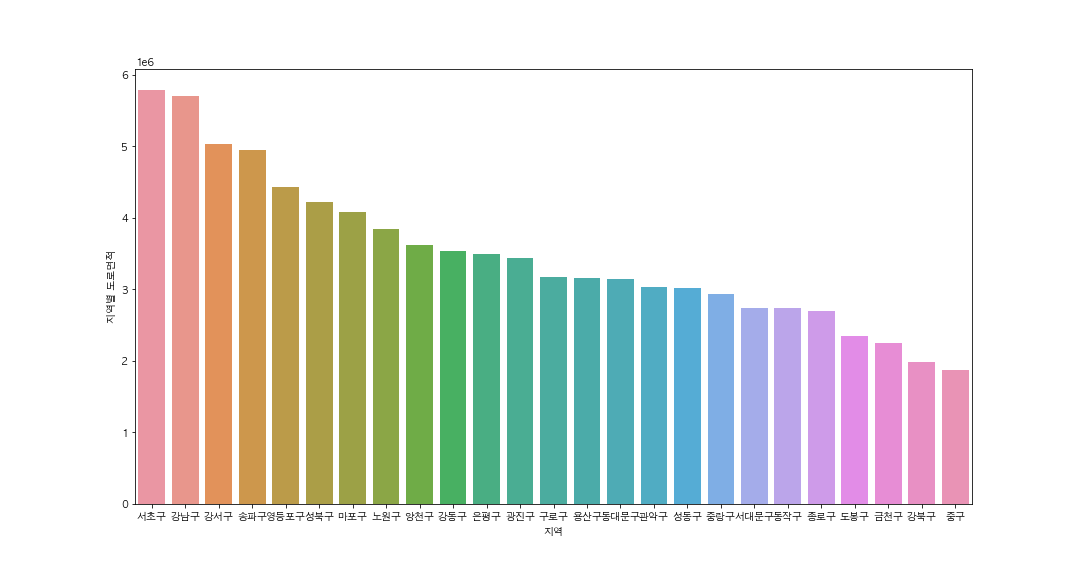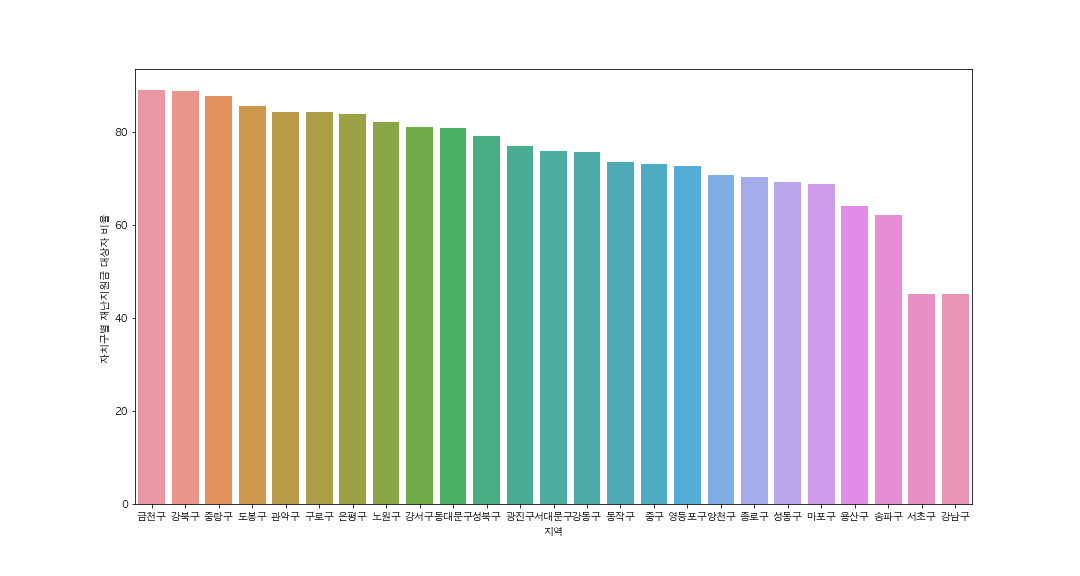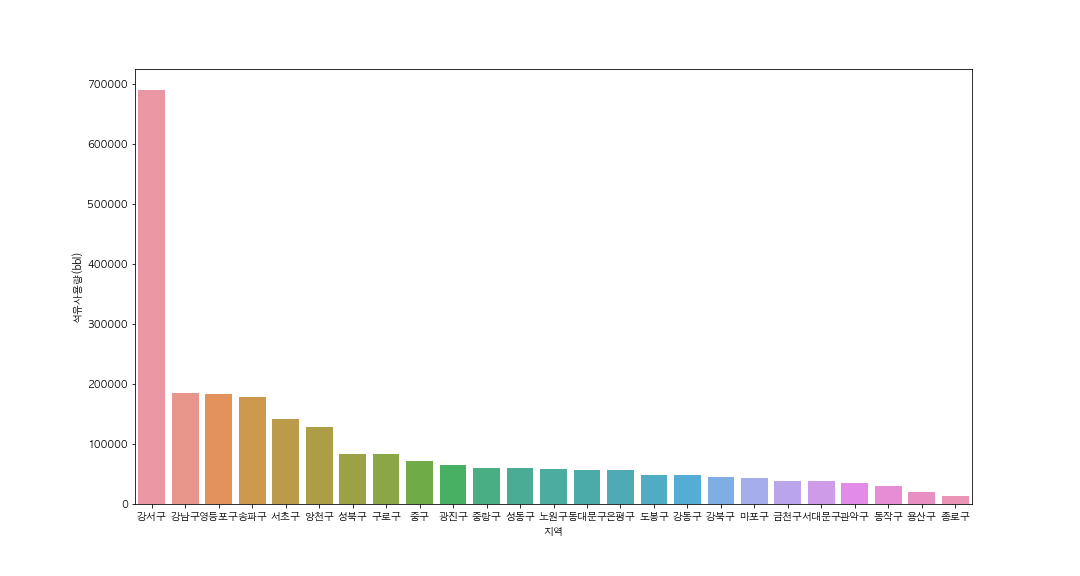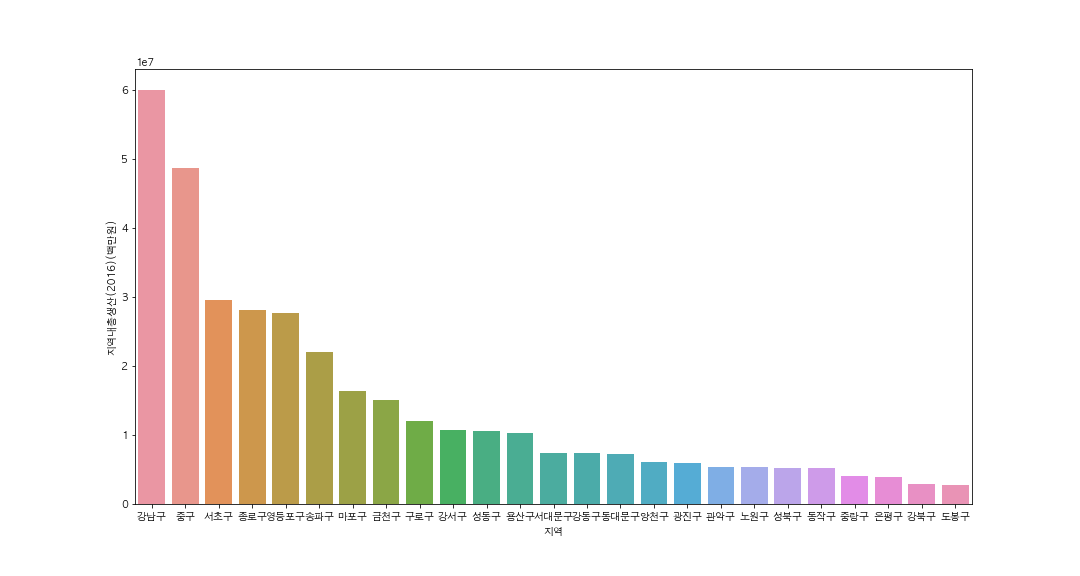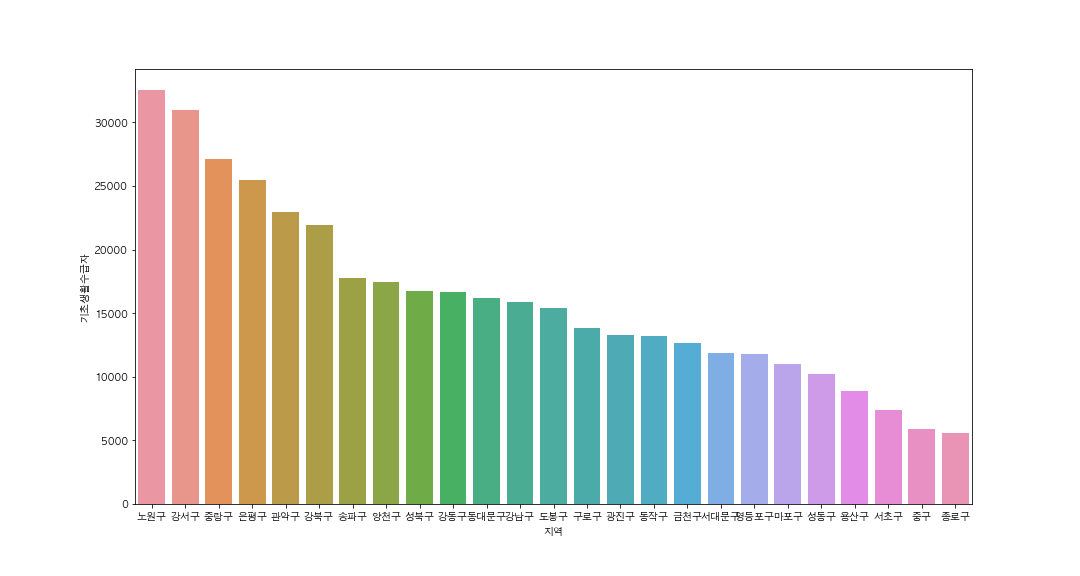

In [85]:
df = pd.read_csv('/content/drive/MyDrive/2. datacamp2022/project/data/데이터셋-수정16 (1).csv',thousands=',')

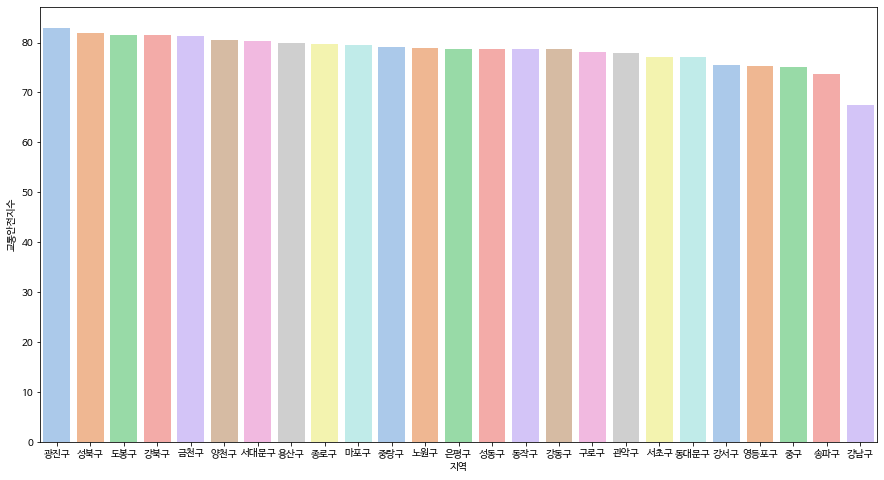

In [87]:
# 지역별 '교통안전지수'

df5 = df.sort_values('교통안전지수',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y='교통안전지수', data = df5 ,palette='pastel')

#의미없는듯

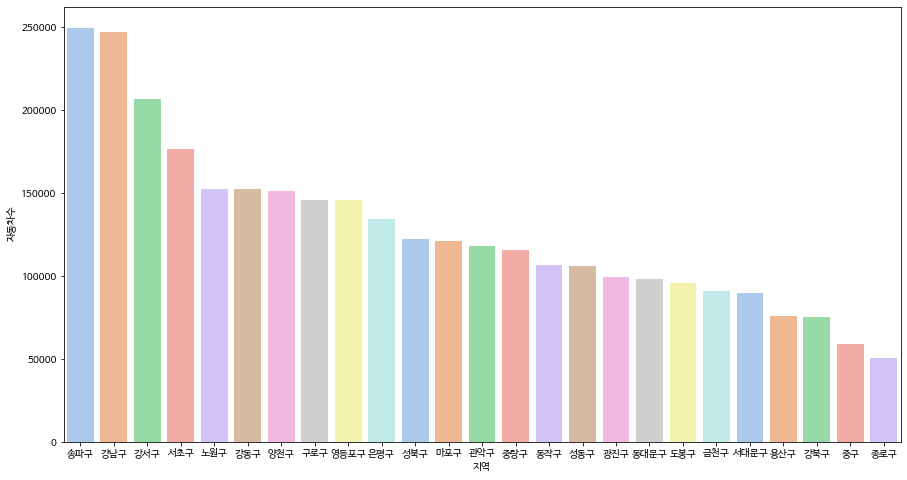

In [88]:
# 지역별 자동차 수

df5 = df.sort_values('자동차수',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y='자동차수', data = df5 ,palette='pastel')

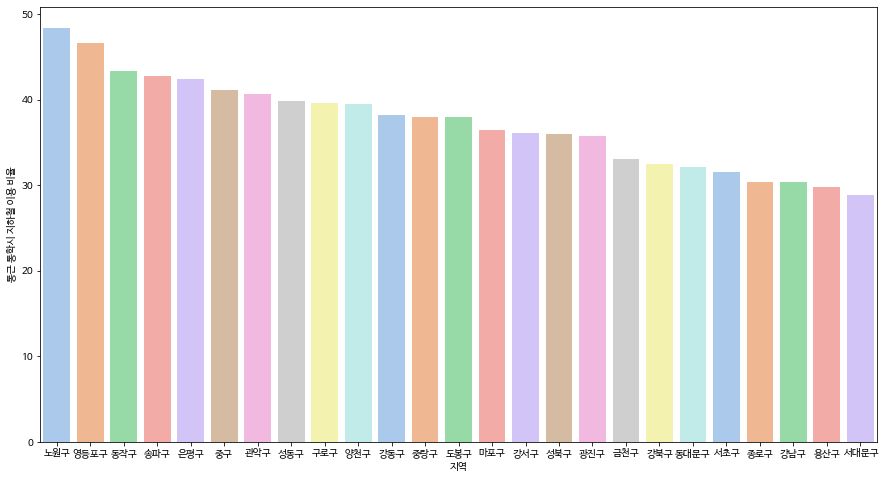

In [90]:
# 지역별  '통근 통학시 지하철 이용 비율'

df5 = df.sort_values( '통근 통학시 지하철 이용 비율',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y= '통근 통학시 지하철 이용 비율', data = df5 ,palette='pastel')

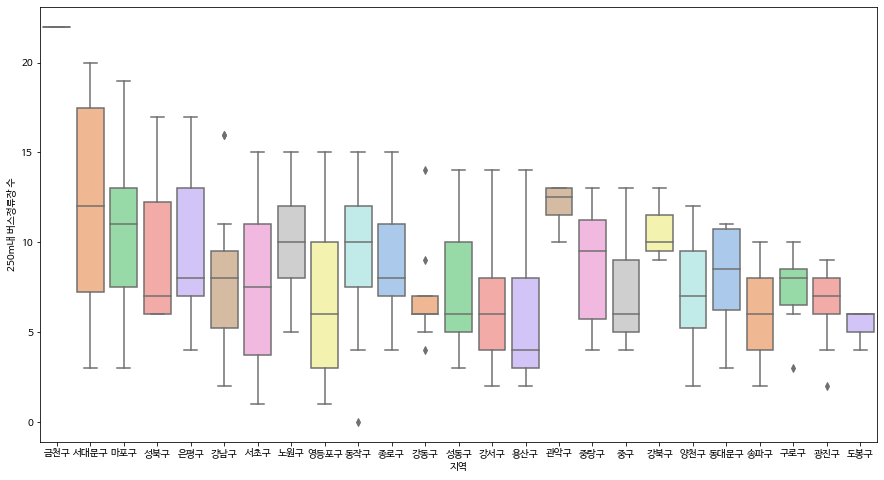

In [92]:
# 지역별  '250m내 버스정류장 수'

df5 = df.sort_values( '250m내 버스정류장 수',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x='지역',y= '250m내 버스정류장 수', data = df5 ,palette='pastel')

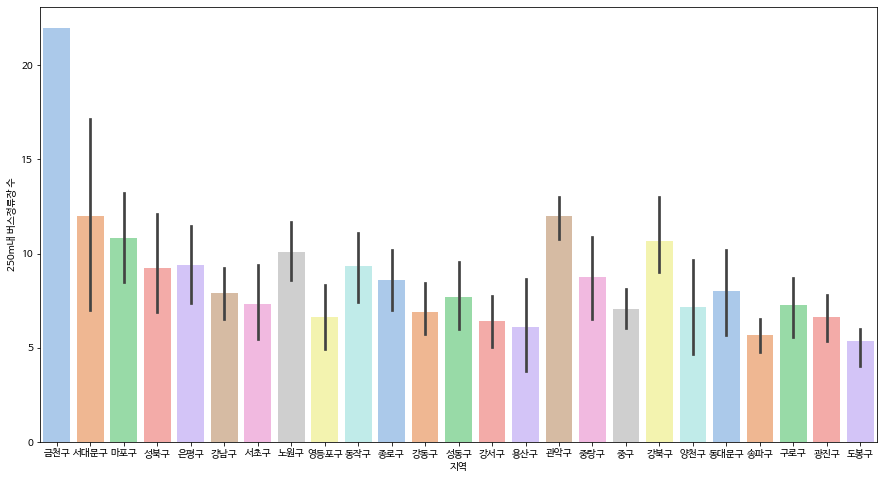

In [94]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='지역',y= '250m내 버스정류장 수', data = df5 ,palette='pastel')